#  Data Cleaning and EDA of Quikr Car data

In [1]:
# importing Warnings to ignore future warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data set
data = pd.read_csv("Quikr_car.csv")

In [4]:
data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [5]:
data.tail()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1031,1031,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Jagdalpur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [6]:
data.shape

(1032, 10)

In [7]:
data.size

10320

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1032 non-null   int64 
 1   Name        1032 non-null   object
 2   Label       1032 non-null   object
 3   Location    1030 non-null   object
 4   Price       1032 non-null   object
 5   Kms_driven  1032 non-null   object
 6   Fuel_type   1032 non-null   object
 7   Owner       740 non-null    object
 8   Year        1032 non-null   int64 
 9   Company     1032 non-null   object
dtypes: int64(2), object(8)
memory usage: 80.8+ KB


# Data Cleaning

In [9]:
# There is no need of unnamed column that's why I am dropping it

data.drop(["Unnamed: 0"],axis = 1,inplace = True)

In [10]:
#pd.set_option("display.max_rows",None)
#data

In [11]:
# Checking duplicate Entry
a = data.duplicated(keep = "first").sum()
print(a)
data.loc[data.duplicated(keep = "first"),:]

11


,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
49,Maruti Suzuki Baleno - 2018,PLATINUM,Pune,"₹6,18,699","68,934 kms",Petrol,2nd Owner,2018,Maruti
144,Renault Kwid - 2019,PLATINUM,Pune,"₹5,04,599","2,311 kms",Petrol,2nd Owner,2019,Renault
288,Hyundai Creta - 2020,PLATINUM,Pune,"₹18,04,399","14,506 kms",Petrol,2nd Owner,2020,Hyundai
312,Maruti Suzuki Celerio VXi - 2019,PLATINUM,Chennai,"₹5,24,799","5,743 kms",Petrol,1st Owner,2019,Maruti
403,Hyundai Santro - 2002,GOLD,Chennai,"₹89,000","85,000 kms",Petrol,NaN,2002,Hyundai
495,MG Motors Hector Sharp 2.0 Diesel - 2019,PLATINUM,Bangalore,"₹18,00,299","11,292 kms",Diesel,2nd Owner,2019,MG
663,MG Motors Hector Sharp 2.0 Diesel - 2019,PLATINUM,Bangalore,"₹19,17,599","10,205 kms",Diesel,2nd Owner,2019,MG
696,Hyundai i20 Asta 1.2 - 2011,PLATINUM,Bangalore,"₹3,99,999","83,803 kms",Petrol,1st Owner,2011,Hyundai
754,MG Motors Hector - 2020,PLATINUM,Bangalore,"₹16,81,899","6,760 kms",Petrol,2nd Owner,2020,MG
864,Hyundai Grand i10 Sportz 1.2 Kappa VTVT - 2018,PLATINUM,Chennai,"₹4,96,199","21,790 kms",Petrol,1st Owner,2018,Hyundai


### 11 Duplicates entry are in dataset as we may see above

In [12]:
# Removing duplicate
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

In [14]:
# Checking Null values
data.isnull().sum()

Name            0
Label           0
Location        2
Price           0
Kms_driven      0
Fuel_type       0
Owner         290
Year            0
Company         0
dtype: int64

In [15]:
#imputing null values with mode
data["Location"] =data["Location"].fillna(data["Location"].mode()[0])
data["Owner"]= data["Owner"].fillna(data["Owner"].mode()[0])

In [16]:
# removing rupees column from price columns 
data["Price"] = [x.strip("₹") for x in data["Price"]]
data["Price"] = data["Price"].str.replace(",","")


In [17]:
#removing kms from kms_driven column
data["Kms_driven"] = data["Kms_driven"].str.split().str.get(0)

In [18]:
# Removing comma 
data["Kms_driven"] = data["Kms_driven"].str.replace(",","")

In [19]:
data = data[data["Price"]!='Ask For Price'] 

In [20]:
#Changing data type of columns
data["Kms_driven"] = data["Kms_driven"].astype("int")
data["Price"] = data["Price"].astype("int")
data["Year"] = data["Year"].astype("int")

In [21]:
#changing data types of columns
data.dtypes

Name          object
Label         object
Location      object
Price          int32
Kms_driven     int32
Fuel_type     object
Owner         object
Year           int32
Company       object
dtype: object

In [22]:
data["Name"] = data["Name"].str.split().str.slice(0,3).str.join(" ")

In [23]:
data

,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,Ford Figo Duratec,PLATINUM,Bangalore,380000,35056,Petrol,2nd Owner,2015,Ford
1,Maruti Suzuki Wagon,PLATINUM,Bangalore,465000,44000,Petrol,2nd Owner,2016,Maruti
2,Hyundai Creta 1.6,PLATINUM,Bangalore,1350000,42917,Petrol,2nd Owner,2018,Hyundai
3,Hyundai Venue -,PLATINUM,Chennai,1019699,16112,Petrol,2nd Owner,2019,Hyundai
4,Honda Jazz -,PLATINUM,Pune,713499,30988,Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...
1027,Hyundai i10 Magna,GOLD,Bangalore,229000,65000,Petrol,1st Owner,2014,Hyundai
1028,Maruti Suzuki Alto,GOLD,Bangalore,275000,60000,Petrol,2nd Owner,2014,Maruti
1029,Jeep Compass Limited,GOLD,Mahasamund,1750000,31000,Diesel,1st Owner,2017,Jeep
1030,Jeep Compass Limited,GOLD,Bilaspur,1750000,31000,Diesel,1st Owner,2017,Jeep


In [24]:
data.describe()

,Price,Kms_driven,Year
count,1.015000e+03,1015.000000,1015.000000
mean,6.833843e+05,50455.159606,2015.813793
std,5.349478e+05,38152.088766,3.361196
min,3.900000e+04,0.000000,2000.000000
25%,4.107990e+05,26535.000000,2014.000000
50%,5.577990e+05,44000.000000,2016.000000
75%,7.870990e+05,67291.000000,2018.000000
max,7.500000e+06,690000.000000,2022.000000


# EDA

In [25]:
data["Label"].value_counts()

PLATINUM    678
GOLD        337
Name: Label, dtype: int64

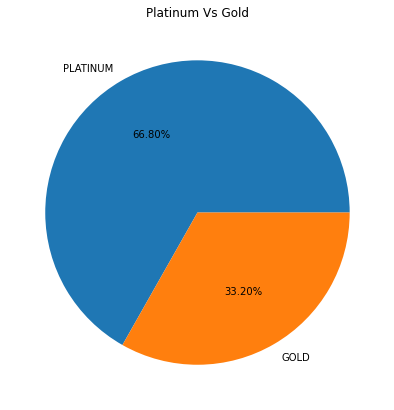

In [26]:
plt.figure(figsize = (12,7))
plt.pie(data["Label"].value_counts(),labels = ["PLATINUM","GOLD"],autopct = "%.2f%%");
plt.title("Platinum Vs Gold");

### Observation :- 66.80% Cars Were Platinum labels and 33.20% Cars were Gold labeled 

In [27]:
data["Location"].value_counts().head(10)

Pune         322
Chennai      308
Bangalore    252
Mumbai        19
Kolkata       19
Madurai       12
Hyderabad     11
Jaipur        10
Delhi         10
Trichy         8
Name: Location, dtype: int64

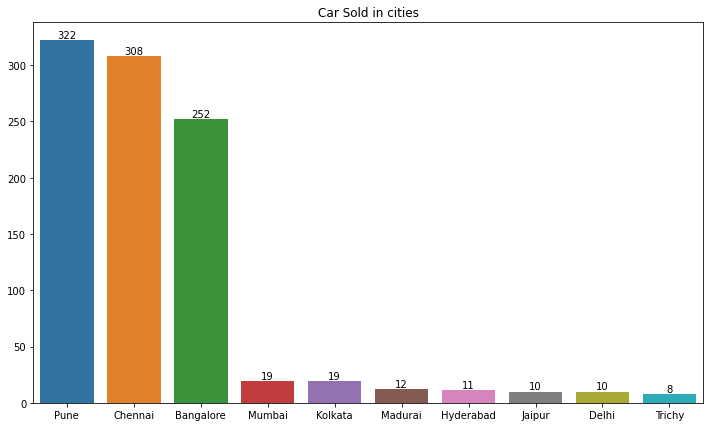

In [28]:
plt.figure(figsize = (12,7))
sns.barplot(x =data["Location"].value_counts().head(10).index,y = data["Location"].value_counts().head(10).values )
plt.title("Car Sold in cities");
for index,value in enumerate(data["Location"].value_counts().head(10).values):
    plt.text(index,value,str(value),ha = "center", va ="bottom")

### Observation :- Here are top 10 cities where cars have sold and top 3 are Pune, Chennai, Bangalore

In [29]:
company = data["Company"].value_counts().head(10)
company

Maruti        381
Hyundai       222
Honda          79
Ford           51
Tata           44
Renault        42
Toyota         41
Mahindra       41
Volkswagen     29
MG             14
Name: Company, dtype: int64

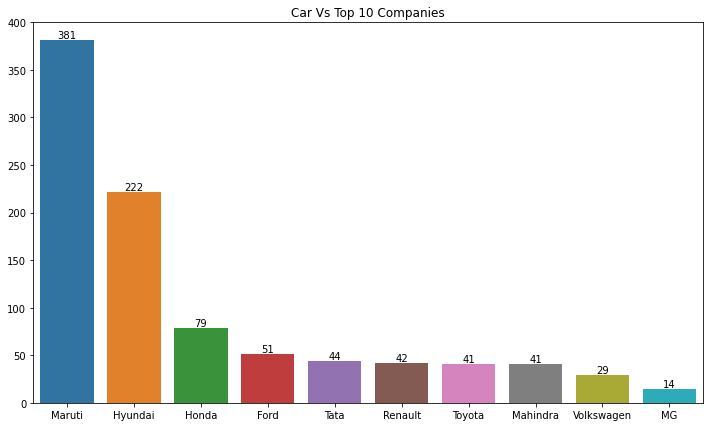

In [30]:
plt.figure(figsize = (12,7))
sns.barplot(x =company.index,y = company.values );
plt.title("Car Vs Top 10 Companies");
for index,value in enumerate(company.values):
    plt.text(index,value,str(value),ha = "center", va ="bottom")

### Observation :- Maruti and Hyundai company's cars have sold more

In [31]:
Year = data.groupby(["Year"]).agg({"Name":"count"}).reset_index()
Year.columns = ["Year","Total_Cars"]
Year

,Year,Total_Cars
0,2000,1
1,2001,3
2,2002,2
3,2003,1
4,2004,2
5,2005,5
6,2006,5
7,2007,17
8,2008,9
9,2009,11


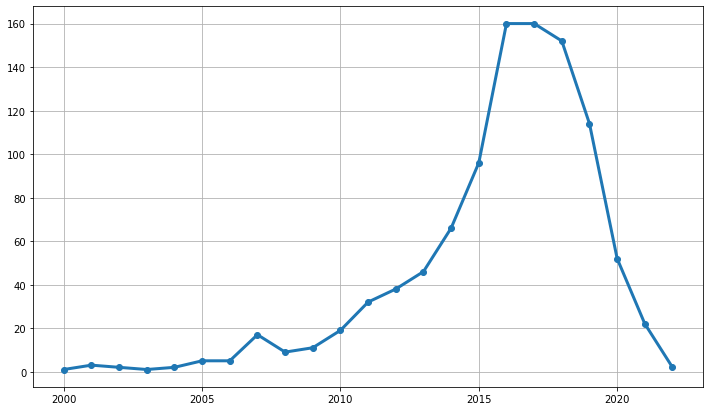

In [32]:
plt.figure(figsize = (12,7))
plt.plot(Year["Year"],Year["Total_Cars"],marker='o',linewidth=3)
plt.grid()


### Observation :- Most of the car have sold in year between 2014 to 2020

In [33]:
location_Label = data.groupby(["Location","Label"]).agg({"Name":"count"}).reset_index().sort_values(by= "Name",ascending = False)
location_Label.head(10)

,Location,Label,Name
37,Pune,PLATINUM,280
3,Bangalore,PLATINUM,204
9,Chennai,PLATINUM,193
8,Chennai,GOLD,115
2,Bangalore,GOLD,48
36,Pune,GOLD,42
30,Mumbai,GOLD,19
22,Kolkata,GOLD,18
27,Madurai,GOLD,12
17,Hyderabad,GOLD,11


### Observation :- Sold Quantity of  Platimun Labeled cars were more in Pune, Banglore,Chennai

In [34]:
Location2 = data.groupby(["Location","Company"]).agg({"Name":"count"}).reset_index().sort_values(by= "Name",ascending = False)
Location2.head(10)

,Location,Company,Name
121,Pune,Maruti,131
37,Chennai,Maruti,126
14,Bangalore,Maruti,93
31,Chennai,Hyundai,75
116,Pune,Hyundai,74
10,Bangalore,Hyundai,57
115,Pune,Honda,25
114,Pune,Ford,21
9,Bangalore,Honda,21
30,Chennai,Honda,17


### Observation :- The Companies of car which have sold in Pune, Banglore,Chennai was Maruti

In [35]:
Location2 = data.groupby(["Year","Company"]).agg({"Name":"count"}).reset_index().sort_values(by= "Name",ascending = False)
Location2.head(10)

,Year,Company,Name
128,2017,Maruti,78
113,2016,Maruti,66
141,2018,Maruti,65
110,2016,Hyundai,49
154,2019,Maruti,47
101,2015,Maruti,34
125,2017,Hyundai,31
99,2015,Hyundai,26
90,2014,Maruti,26
138,2018,Hyundai,26


### Observation:- The cars which have sold between year 2014 to 2020 were of Maruti And Hyundai company's

In [36]:
data["Fuel_type"].value_counts()

 Petrol           564
 Diesel           156
 Petrol           151
 Diesel           131
 CNG                4
 CNG                3
 Electric           2
 Petrol + CNG       2
 LPG                1
 Hybrid             1
Name: Fuel_type, dtype: int64

### As I have deleted duplicate value while data cleaning but still showing duplicate value above 

In [37]:
# Fixing above issue 
data["Fuel_type"] = data["Fuel_type"].str.strip()

In [38]:
fuel = data["Fuel_type"].value_counts()
fuel

Petrol          715
Diesel          287
CNG               7
Electric          2
Petrol + CNG      2
LPG               1
Hybrid            1
Name: Fuel_type, dtype: int64

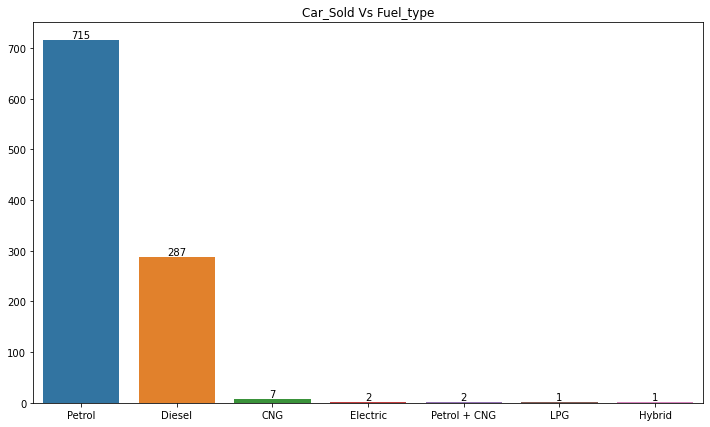

In [39]:
plt.figure(figsize = (12,7))
sns.barplot(x = fuel.index, y = fuel.values)
plt.title("Car_Sold Vs Fuel_type");
for index,value in enumerate(fuel.values):
    plt.text(index,value,str(value),ha = "center",va = "bottom")


### Obseravtion:- Most of car's fuel type was Petrol